# Plot results from full run of WHOBS simulations


Download Jupyter notebook at https://github/PyPSA/WHOBS

In [20]:
import pypsa

import pandas as pd

idx = pd.IndexSlice

import matplotlib.pyplot as plt

from pyomo.environ import Constraint

%matplotlib inline

In [21]:
country_to_code = {
'EU28' : 'EU',
'EA19' : 'EA',
'Belgium' : 'BE',
'Bulgaria' : 'BG',
'Czech Republic' : 'CZ',
'Denmark' : 'DK',
'Germany' : 'DE',
'Estonia' : 'EE',
'Ireland' : 'IE',
'Greece' : 'GR',
'Spain' : 'ES',
'France' : 'FR',
'Croatia' : 'HR',
'Italy' : 'IT',
'Cyprus' : 'CY',
'Latvia' : 'LV',
'Lithuania' : 'LT',
'Luxembourg' : 'LU',
'Hungary' : 'HU',
'Malta' : 'MA',
'Netherlands' : 'NL',
'Austria' : 'AT',
'Poland' : 'PL',
'Portugal' : 'PT',
'Romania' : 'RO',
'Slovenia' : 'SI',
'Slovakia' : 'SK',
'Finland' : 'FI',
'Sweden' : 'SE',
'United Kingdom' : 'GB',
'Iceland' : 'IS',
'Norway' : 'NO',
'Montenegro' : 'ME',
'FYR of Macedonia' : 'MK',
'Albania' : 'AL',
'Serbia' : 'RS',
'Turkey' : 'TU',
'Bosnia and Herzegovina' : 'BA',
'Kosovo\n(UNSCR 1244/99)' : 'KO',  #2017 version
'Kosovo\n(under United Nations Security Council Resolution 1244/99)' : 'KO',  #2016 version
'Moldova' : 'MO',
'Ukraine' : 'UK',
'Switzerland' : 'CH',
}

code_to_country = { v : k for k,v in country_to_code.items()}

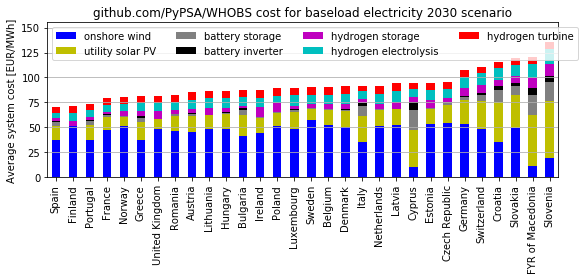

In [42]:
scenario = "2030"

filename = "results-181002/summary.csv"

results = pd.read_csv(filename,index_col=0,header=[0,1])

results = results[scenario]

order = ["wind","solar","batt","charger","H2","elec","fc"]

rename = {"wind" : "onshore wind",
          "solar" : "utility solar PV",
          "batt" : "battery storage",
          "charger" : "battery inverter",
          "H2" : "hydrogen storage",
          "elec" : "hydrogen electrolysis",
          "fc" : "hydrogen turbine"}

rename = {"cost-"+k : v for k,v in rename.items()}

colours = {"wind" : "b",
           "solar" : "y",
           "batt" : "gray",
           "charger" : "k",
           "H2" : "m",
           "elec" : "c",
           "fc" : "r"
          }


fig,ax=plt.subplots()
fig.set_size_inches((8,4))

results.sort_values(by="cost",axis=1).rename(columns=code_to_country).loc[["cost-"+i for i in order]].T.rename(columns=rename).plot(kind="bar",stacked=True,
                                                 color=[colours[i] for i in order],
                                                                      ax=ax)
ax.legend(ncol=4,loc="upper left")

ax.set_xlabel("")

ax.set_ylim([0,results.loc["cost"].max()+20])

ax.grid(axis="y")

ax.set_ylabel("Average system cost [EUR/MWh]")

ax.set_title("github.com/PyPSA/WHOBS cost for baseload electricity {} scenario".format(scenario))

fig.tight_layout()

fig.savefig("img/{}.png".format(scenario),dpi=100)

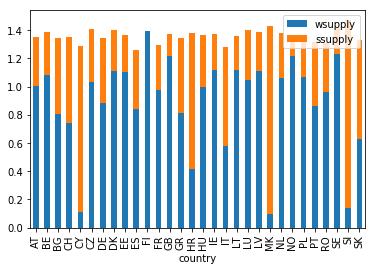

In [46]:
#plot oversupply due to storage losses and curtailment
results.loc[["wsupply","ssupply"]].T.plot(kind="bar",stacked=True)